### imports


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Load your data
df = pd.read_csv('../data/data.csv')  # Replace with your actual file path

# Model Selection and Training

### Split the Data

In [18]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Choose Models

In [7]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'GBM': GradientBoostingClassifier(random_state=42)
}

### Train the Models

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Random Forest trained.
GBM trained.


### Hyperparameter Tuning

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train and y_train are already defined and preprocessed
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Optimized Random Forest Hyperparameter Tuning
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_dist = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [10, 20, 50],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=30,  # Reduced number of iterations
    cv=3,  # Reduced cross-validation folds
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)
print("Best parameters from Random Search for Random Forest:", rf_random_search.best_params_)

# Optimized GBM Hyperparameter Tuning
gbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gbm_param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__subsample': [0.8, 1.0]
}

gbm_random_search = RandomizedSearchCV(
    gbm_pipeline,
    param_distributions=gbm_param_dist,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced cross-validation folds
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

gbm_random_search.fit(X_train, y_train)
print("Best parameters from Random Search for GBM:", gbm_random_search.best_params_)

Best parameters from Random Search for Random Forest: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 50, 'classifier__bootstrap': False}
Best parameters from Random Search for GBM: {'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}


# Model Evaluation

/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 0.93


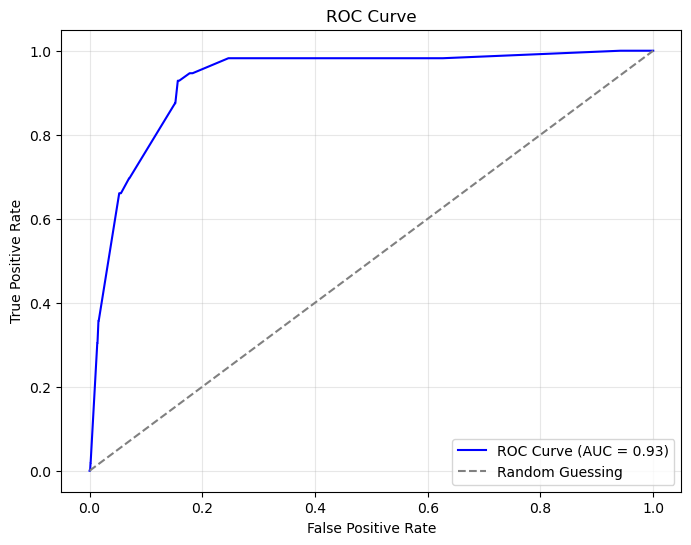

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the test data (X_test and y_test)
# For example:
# X_test = your_test_features
# y_test = your_true_labels

# Predicting using your model (replace 'your_model' with the actual trained model)
y_pred = rf_random_search.predict(X_test)  # If you're using Random Forest, for example
y_pred_prob = rf_random_search.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# ROC-AUC and Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()